In [87]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
data = pd.read_csv("../../../data/twitter-scraped-data/antisemitism/processed.csv")

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
data.head()

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,conversation_id,date,tweet,hashtags,user_id_str,username,name,link,urls,photos,nlikes,nreplies,nretweets,search,reply_to,score,cleaned_tweet,lg_number_of_capital_letters,lg_number_of_words_starting_with_capital_letters,lg_percent_of_complex_nouns,lg_percent_of_nouns,lg_percent_of_complex_verbs,lg_percent_of_verbs,lg_percent_of_complex_adjectives,lg_percent_of_adjectives,lg_noun_to_verb_ratio,lg_number_of_words,lg_number_of_complex_words,lg_percent_of_complex_words,lg_number_of_sentences,lg_average_sentence_length,lg_fog_index,lg_pisarek_index,lg_contains_badword,purified_tweet
0,1465100306920972293,1465053734241714184,2021-11-29 00:28:28,@EmiliaKaminska @JerzyOstrowski5 @gazeta_wyborcza Jak żyd w okupacji,[],1289137837972107264,JacekKo11354585,Jacek Kowalski,https://twitter.com/JacekKo11354585/status/1465100306920972293,[],[],1,0,0,Żyd,"[{'screen_name': 'EmiliaKaminska', 'name': 'Emilia Kamińska', 'id': '923171498382254080'}, {'screen_name': 'JerzyOstrowski5', 'name': 'Jurek Ostrowski🇵🇱PL', 'id': '931530722338377728'}, {'screen_name': 'gazeta_wyborcza', 'name': 'Gazeta Wyborcza.pl', 'id': '19179390'}]",1,Jak żyd w okupacji,1,1,25.000000,50.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,4,1,25.000000,1,4.00,11.600000,12.658989,False,żyd okupacji
1,1465099908365664258,1464992046821871621,2021-11-29 00:26:53,@AM_Zukowska Jako żyd dziękuję. Ale zastanawia mnie ta nierówność traktowania przez Panią żydów i katolików.,[],1161341418146807808,lignator3,lignator,https://twitter.com/lignator3/status/1465099908365664258,[],[],0,0,0,Żyd,"[{'screen_name': 'AM_Zukowska', 'name': 'Anna-Maria Żukowska 💁🏻\u200d♀️ #Lewica ↙️↙️↙️🏳️\u200d🌈☮️', 'id': '941899796'}]",0,Jako żyd dziękuję. Ale zastanawia mnie ta nierówność traktowania przez Panią żydów i katolików.,3,3,7.142857,35.714286,7.142857,21.428571,0.000000,0.000000,1.666667,14,2,14.285714,2,8.00,8.514286,7.954270,False,żyd dziękuję zastanawia nierówność traktowania panią żydów katolików
2,1465096114126864391,1464992046821871621,2021-11-29 00:11:48,@AM_Zukowska Zaden szanujacy sie Zyd nie bedzie komunista.,[],1329201104526127104,Wonski4,Hebrew Hammer,https://twitter.com/Wonski4/status/1465096114126864391,[],[],1,0,0,Żyd,"[{'screen_name': 'AM_Zukowska', 'name': 'Anna-Maria Żukowska 💁🏻\u200d♀️ #Lewica ↙️↙️↙️🏳️\u200d🌈☮️', 'id': '941899796'}]",1,Zaden szanujacy sie Zyd nie bedzie komunista.,2,2,28.571429,28.571429,0.000000,0.000000,0.000000,14.285714,-1.000000,7,2,28.571429,1,8.00,14.228571,14.708217,False,szanujacy zyd komunista
3,1465082612301668364,1465058551106256905,2021-11-28 23:18:09,"@PitBrat51 o, żyd daniels opowiedział się po właściwej stronie, szpieg mosadu na salonach witany jak mesjasz",[],859073386584178690,m_odziej,Młodziej ♂️ 🇵🇱 كافر #WhiteLivesMatter ***** tvn,https://twitter.com/m_odziej/status/1465082612301668364,[],[],2,0,0,Żyd,"[{'screen_name': 'PitBrat51', 'name': 'Pit Brat 5', 'id': '1397490063676747776'}]",2,"o, żyd daniels opowiedział się po właściwej stronie, szpieg mosadu na salonach witany jak mesjasz",0,0,0.000000,33.333333,6.666667,6.666667,0.000000,20.000000,5.000000,15,1,6.666667,1,17.00,8.666667,8.207382,False,żyd daniels opowiedział właściwej stronie szpieg mosadu salonach witany mesjasz
4,1465080064219955202,1464292873898237959,2021-11-28 23:08:01,"@MuzeumAuschwitz Przykre...cieszę się, że teraz Ci ludzie wracają ""do żywych"". Pamięć po nich bedzie. Bede wdzieczna rowniez za dookreslanie innych narodowosci (tak jak tutaj napisane jest ""holenderski Żyd"", tak przy innych wyznaniach rowniez byloby to wskazane np niemiecki Ewangelik",[],1440208701562908680,Anna80693377,Anna,https://twitter.com/Anna80693377/status/1465080064219955202,[],[],0,0,0,Żyd,"[{'screen_name': 'MuzeumAuschwitz', 'name': 'Muzeum Auschwitz', 'id': '1239961987154575360'}]",0,"Przykre...cieszę się, że teraz Ci ludzie wracają ""do żywych"". Pamięć po nich bedzie. Bede wdzieczna rowniez za dookreslanie innych narodowosci (tak jak tutaj napisane jest ""holenderski Żyd"", tak przy innych w

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


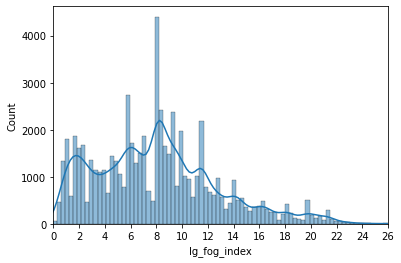

<Figure size 1080x1440 with 0 Axes>

count    63268.000000
mean     8.062219    
std      4.897524    
min     -1.000000    
25%      4.450000    
50%      8.010526    
75%      10.800000   
max      40.800000   
Name: lg_fog_index, dtype: float64


In [90]:
# Fog index distribution
fig, ax = plt.subplots()
plt.figure(figsize=(15,20))

sns.histplot(data['lg_fog_index'], kde = True, ax = ax)
ax.set_xlim(0,26)
ax.set_xticks(range(0, 28, 2))
plt.show()

print(data['lg_fog_index'].describe())
#Fog index histplot shows the average of 8 points with standard deviation of 4.8. 8 points means that most of the tweets are around 8th grader level.

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


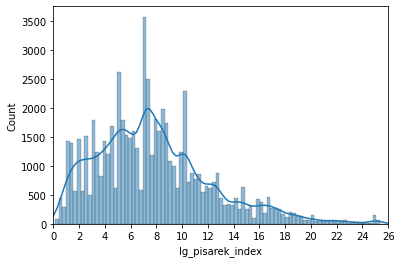

<Figure size 1080x1440 with 0 Axes>

count    63268.000000
mean     7.845247    
std      4.735163    
min     -1.000000    
25%      4.500000    
50%      7.231325    
75%      10.151970   
max      50.009999   
Name: lg_pisarek_index, dtype: float64


In [91]:

fig, ax = plt.subplots()
plt.figure(figsize=(15,20))

sns.histplot(data['lg_pisarek_index'], kde = True, ax = ax)
ax.set_xlim(0,26)
ax.set_xticks(range(0, 28, 2))
plt.show()

print(data['lg_pisarek_index'].describe())

## Extra cleaning

In [92]:
#Deleting https://twitter.com/melodrama_tures. It is a bot.
data['purified_tweet'] = data[data['username'] != 'melodrama_tures']['purified_tweet']

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
#Deleting search keywords
search_keyword_list = sorted(list(data['search'].unique()), key = len, reverse = True)
search_keyword_list.append('zyda')

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## WordCloud

In [94]:
from wordcloud import WordCloud

stringed_data = data['purified_tweet'].to_string()

for search_keyword in search_keyword_list:
    stringed_data = stringed_data.replace(search_keyword.lower(), '')

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
wordcloud = WordCloud(width = 800, height = 400, random_state=1, background_color='white', colormap='winter', collocations=False).generate(stringed_data)
wordcloud.to_file("general_wordcloud.png")

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Vectorization

In [96]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
NUMBER_OF_TOPICS = 10

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
def search_keyword_replace(tweet):
    if type(tweet) == str:
        for search_keyword in search_keyword_list:
            tweet = tweet.replace(search_keyword.lower(), '')
    return tweet
data['purified_tweet'] = data['purified_tweet'].apply(lambda tweet: search_keyword_replace(tweet))

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, lowercase=True)
data_tfidf_vectorized = tfidf_vectorizer.fit_transform(data['purified_tweet'].values.astype('U'))

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
count_vectorizer = CountVectorizer(min_df=5, max_df=0.9, lowercase=True)
data_count_vectorized = count_vectorizer.fit_transform(data['purified_tweet'].values.astype('U'))

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Topic modelling for TFIDF

In [101]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUMBER_OF_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_tfidf_vectorized)

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [102]:
# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUMBER_OF_TOPICS)
data_nmf = nmf.fit_transform(data_tfidf_vectorized) 

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [103]:
# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=NUMBER_OF_TOPICS)
data_lsi = lsi.fit_transform(data_tfidf_vectorized)

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
print("LDA Model:")
selected_topics(lda, tfidf_vectorizer)

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA Model:
Topic 0:
[('nan', 5176.327122055844), ('stycznia', 226.41385491486844), ('obozie', 156.01681118505687), ('urodził', 141.2037896394953), ('birkenau', 131.41944832134487), ('nr', 128.18685917281974), ('xd', 120.61061565169295), ('zginął', 115.31550244347169), ('grudnia', 108.81705288815385), ('polak', 90.51596736428581)]
Topic 1:
[('rip', 123.3809970580657), ('izraela', 90.20344935851215), ('polskich', 87.0733946906256), ('problem', 83.51318631188201), ('polin', 83.13243648064108), ('rozumiem', 76.8958814260008), ('prezydent', 75.04773570367983), ('święta', 69.24993926534101), ('usa', 64.62385017470481), ('wojnie', 64.33675269383123)]
Topic 2:
[('online', 319.25536311944495), ('prosimy', 161.6089483124592), ('koncie', 160.9140983430265), ('zyd', 158.9601839643674), ('opowiadamy', 158.86481280195395), ('kl', 149.72235393870008), ('ofiary', 114.15542373579467), ('dnia', 113.41714436590938), ('the', 82.3741492222228), ('ka', 80.1803054055581)]
Topic 3:
[('obozu', 164.860473081047

In [106]:
print("NMF Model:")
selected_topics(nmf, tfidf_vectorizer)

NMF Model:
Topic 0:
[('nan', 8.196271452572079), ('яхира', 0.0), ('marks', 0.0), ('maria', 0.0), ('marian', 0.0), ('mariana', 0.0), ('marianna', 0.0), ('marie', 0.0), ('marii', 0.0), ('marine', 0.0)]
Topic 1:


c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('online', 2.2965992095966716), ('dziękujemy', 1.153886242069578), ('podcasty', 1.153668871275938), ('trudnej', 1.1534821263238706), ('danie', 1.1527785070072205), ('obserwowanie', 1.1526601399789884), ('misji', 1.152202447768704), ('wspieranie', 1.1520928390849108), ('opowiadamy', 1.1515755183241876), ('polecamy', 1.1493857845190811)]
Topic 2:
[('uczymy', 1.3632380571989546), ('obserwowania', 1.3615077409497243), ('upamiętniamy', 1.361285774692081), ('tragicznej', 1.3602266295807632), ('zachęcamy', 1.3599889626618893), ('ofiary', 1.3230541738665373), ('każdego', 1.3125771169389822), ('dnia', 1.2844420610757126), ('historii', 1.0697553994111684), ('międzynarodowego', 0.014849725492496522)]
Topic 3:
[('polsce', 1.7081006464443096), ('polacy', 1.6681689508255144), ('polski', 1.458651823971657), ('niemcy', 1.2039663846556048), ('zydow', 0.7568613454921497), ('zydzi', 0.6996336928236861), ('jesteś', 0.6619212032498191), ('polska', 0.6169956527333074), ('chyba', 0.5288080230022177), ('ludz

In [107]:
print("LSI Model:")
selected_topics(lsi, tfidf_vectorizer)

LSI Model:
Topic 0:


c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('nan', 1.0000000000000022), ('zydow', 1.1763286670904853e-11), ('polsce', 7.049398444097241e-12), ('rip', 5.770285527983255e-12), ('jesteś', 4.1835942467965524e-12), ('jezus', 3.4945505752991096e-12), ('polacy', 3.2128865154605966e-12), ('polaków', 2.412634682569967e-12), ('gorsze', 1.8773135739055074e-12), ('nazistowskie', 1.725255062385631e-12)]
Topic 1:
[('online', 0.4493998149439745), ('dziękujemy', 0.22581889480229306), ('podcasty', 0.2257473327449792), ('trudnej', 0.22571561032810694), ('danie', 0.22557444529178944), ('obserwowanie', 0.22555014133047566), ('misji', 0.22546243277120967), ('wspieranie', 0.2254417944725719), ('opowiadamy', 0.22533881591452506), ('polecamy', 0.2249123315994554)]
Topic 2:
[('uczymy', 0.3450619296289012), ('obserwowania', 0.34462778667232496), ('upamiętniamy', 0.3445686252800118), ('tragicznej', 0.3443145964385277), ('zachęcamy', 0.3442672467174533), ('ofiary', 0.33580605956137616), ('każdego', 0.3327674377212737), ('dnia', 0.3267765561917454), ('his

## Visualizing LDA results with pyLDAvis (TFIDF)

In [108]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_tfidf_vectorized, tfidf_vectorizer, mds='tsne')
dash

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8      32.420952  8.115230   1       1        16.690448
5      0.648955   71.707100  2       1        10.369672
9      71.019684  9.971006   3       1        9.904824 
4      3.785981   33.185135  4       1        9.826841 
3     -42.666500 -9.222070   5       1        9.664042 
0     -3.621689  -43.526516  6       1        9.374130 
2     -3.632402  -4.171708   7       1        8.956248 
6     -36.584400  35.804413  8       1        8.757589 
7      44.391380  50.615383  9       1        8.255467 
1      40.235809 -31.591665  10      1        8.200738 , topic_info=            Term         Freq        Total Category  logprob  loglift
7830   nan        4189.000000  4189.000000  Default  30.0000  30.0000
9393   online     295.000000   295.000000   Default  29.0000  29.0000
4206   historii   278.000000   278.000000   Default  28.0000  28.0000
9848   pamięci    242.000000   242.000000   Default  27.0000  27.0000
2948   dzień      220.000000   220.000000   Default  26.0000  26.0000
...      ...             ...          ...       ...      ...      ...
16187  usa        61.567265    139.939426   Topic10 -5.3819   1.6799 
19586  zydowskie  40.796489    75.917224    Topic10 -5.7934   1.8799 
6799   masz       45.168153    139.034485   Topic10 -5.6916   1.3766 
15242  temu       42.317352    122.554088   Topic10 -5.7568   1.4376 
10880  polski     39.364693    338.916437   Topic10 -5.8292   0.3481 

[461 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
29     7      0.980255  27          
197    8      0.158168  akurat      
197    10     0.819599  akurat      
369    6      0.176270  antysemityzm
369    9      0.820331  antysemityzm
...   ..           ...           ...
19960  10     0.988303  święta      
19967  10     0.973654  święto      
20059  1      0.884850  życie       
20059  9      0.106182  życie       
20065  3      0.969784  życiu       

[633 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 10, 5, 4, 1, 3, 7, 8, 2])

In [109]:
data[data['purified_tweet'].str.contains('kl') == True][['tweet','purified_tweet']]#['username'].value_counts()

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet,purified_tweet
18,"Na razie p. @cieniu powiem wam, to co mi stary pl=żyd rzekł, przed siabesem, z którym coś tam usiłuję sklecić w biznesie. Panie - on do mnie - to ja im w Izraelu tłumaczę, że to żydzi uczyli się robić interes od Polaków, on tak sam z siebie, i to jest dobry szmonces.. na dziś.",razie p powiem stary pl rzekł siabesem usiłuję sklecić biznesie panie izraelu tłumaczę uczyli robić interes polaków siebie dobry szmonces
22,"@r_laszuk Wszedł w drugiej połowie i wygladal równie słabo, co Bida. Złe decyzje, latał jak Żyd po pustym sklepie. Bez celu",wszedł drugiej połowie wygladal równie słabo bida złe decyzje latał pustym sklepie celu
62,28 listopada 1916 | W Oslo urodził się norweski Żyd Salomon Lewenstein. Szklarz. W #Auschwitz od 1 grudnia 1942 r. Nr 79172 Zginął w obozie 27 stycznia 1943 r. https://t.co/lQfSJoErMQ,28 listopada oslo urodził norweski salomon lewenstein szklarz grudnia r nr zginął obozie stycznia r
82,Zaklamany zyd Mattityahu!,zaklamany zyd mattityahu
88,@21schilling @ttxyn1 Zaklamany zyd Mattityahu mial racje. To dzial!,zaklamany zyd mattityahu mial racje dzial
...,...,...
63172,"@prezydentpl @wkolarski @AndrzejDuda Nie było żadnego ""wyzwolenia"" KL Auschwitz❗Ruskie sołdaty weszły tam 6 dni po opuszczeniu obozu przez Niemców. Sowieci nie wyzwalali również opustoszalej i zrujnowanej Warszawy po wycofaniu się Niemców. Sowieci nie ""wyzwalali"" Polski w drodze na Berlin lecz okupowali nas do 1993",żadnego wyzwolenia kl ruskie sołdaty weszły dni opuszczeniu obozu niemców sowieci wyzwalali opustoszalej zrujnowanej warszawy wycofaniu niemców sowieci wyzwalali polski drodze berlin okupowali
63185,"Collections of the Auschwitz-Birkenau State Museum. . Zofia Stępień. «Prayer», pencil, crayons, paper, 14 x 8,8 cm, KL Auschwitz 1943. . Franciszka Studzińska.«Rosary», bread, length 35.5 cm, KL Auschwitz 1942-43. https://t.co/mufnOvS1i1",collections of the birkenau state museum zofia stępień prayer pencil crayons paper8 cm kl franciszka studzińskarosary bread length5 cm kl 43
63238,@USConsKrakow @MuzeumAuschwitz Franklin D. Roosevelt gdyby nie był rasista i wspólnikiem Stalina to USA by kogoś uratowały z Holokaustu,franklin d roosevelt rasista wspólnikiem stalina usa kogoś uratowały
63257,"FUCK YOU Tennessee school board!! Rada szkolna Tenn.USA, zakazała nauczania w klasach nagrodzonej Pulitzerem powieści o Holokauście. Jest to ""po prostu zbyt zorientowane na dorosłych"" A 🇵🇱dalej obrażeni na świnki? Tak tylko pytam, aby się nie ześwinić! https://t.co/tJmQTZmtaU",fuck you tennessee school board rada szkolna tennusa zakazała nauczania klasach nagrodzonej pulitzerem powieści prostu zbyt zorientowane dorosłych dalej obrażeni świnki pytam ześwinić


In [110]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash


c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'data_vectorized' is not defined